## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [273]:
import random
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [239]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

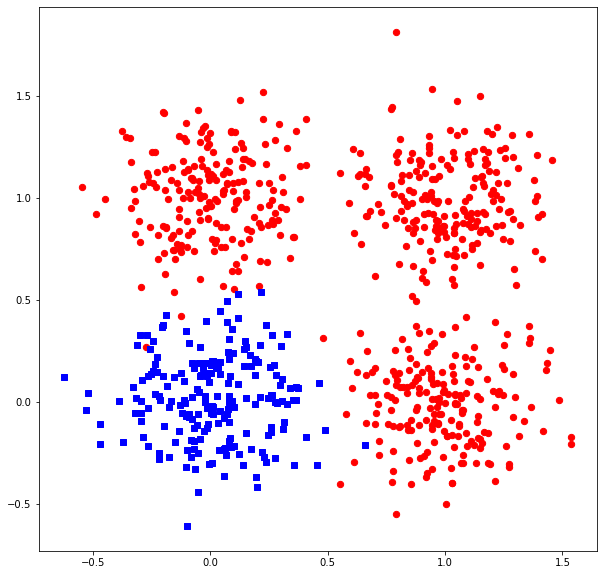

In [240]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e targe 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e targe 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e targe 1
ax.scatter(x, y, c='b', s=40, marker='s', label='0')
plt.show()

Tentando usar uma curva para limitar os dois grupos dentro do conjuto de dados.

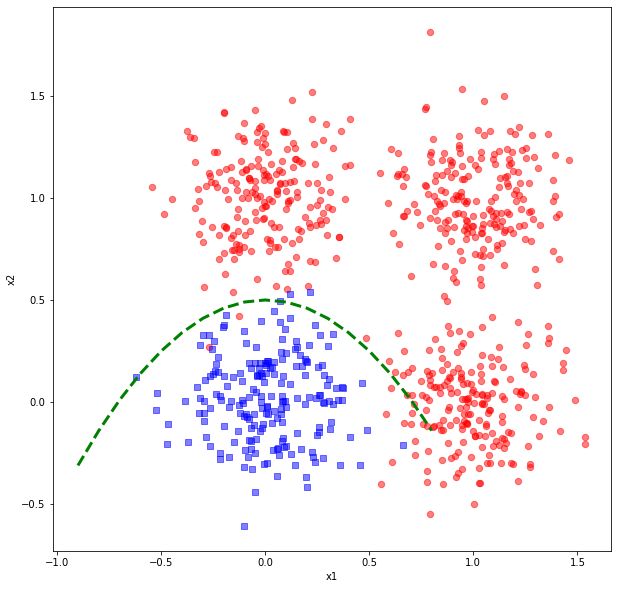

In [241]:
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    #return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    return -x_1**2 + x_1/2000 + 0.5

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dataset[:,0][dataset[:,2] == 0.0], dataset[:,1][dataset[:,2] == 0.0], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(dataset[:,0][dataset[:,2] == 1.0], dataset[:,1][dataset[:,2] == 1.0], marker='s', color='blue', s=40, alpha=0.5)
#plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')

# Adding decision boundary to plot
x_1 = np.arange(-0.9, 0.9, 0.1) #np.array([-.7, .0, .5, .6, .7, .8, 1])
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'g--', lw=3)
plt.show()

In [242]:
#TODO: criar uma função de fronteira que delimite a os grupos

## Separando os dados em treino e teste

Criando funções para dividir o dataset em treino e teste e plotar esses dados para visualizar como eles estão dispostos

```
@method: criate data train and test

@parameters: dataset, percent

@return: x train and test and y train and test
```

number_instances_train=560
number_instances_test=240


(array([[ 0.32202822,  0.9463054 ],
        [ 0.95164664,  0.28950339],
        [ 0.82368976,  0.98500605],
        ...,
        [ 0.00842475,  0.20229318],
        [ 0.92836141,  0.92514396],
        [-0.0907412 , -0.05805187]]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0

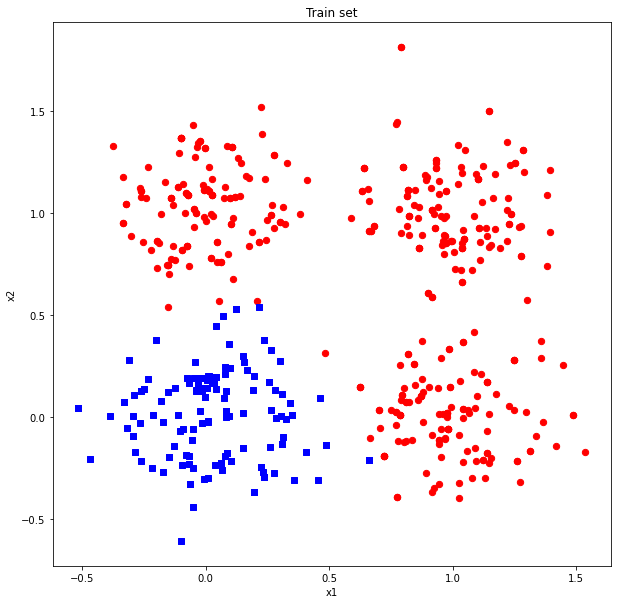

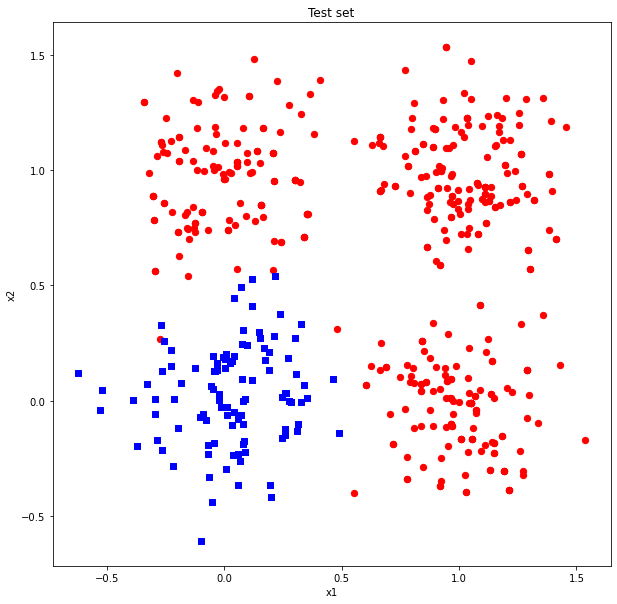

In [305]:
def plot_set(d, title=''):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40)
    ax.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40)
    plt.title(title)
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    #print('dataset_train=',dataset[index])
    plot_set(dataset[index], 'Train set')
    #print('dataset_test=',dataset[~index])
    plot_set(dataset[~index], 'Test set')
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

train_test_split(dataset, .7)